### Dependencies

In [4]:
import matplotlib as mpl
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


import matplotlib.pyplot as plt

mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### L2 vs h

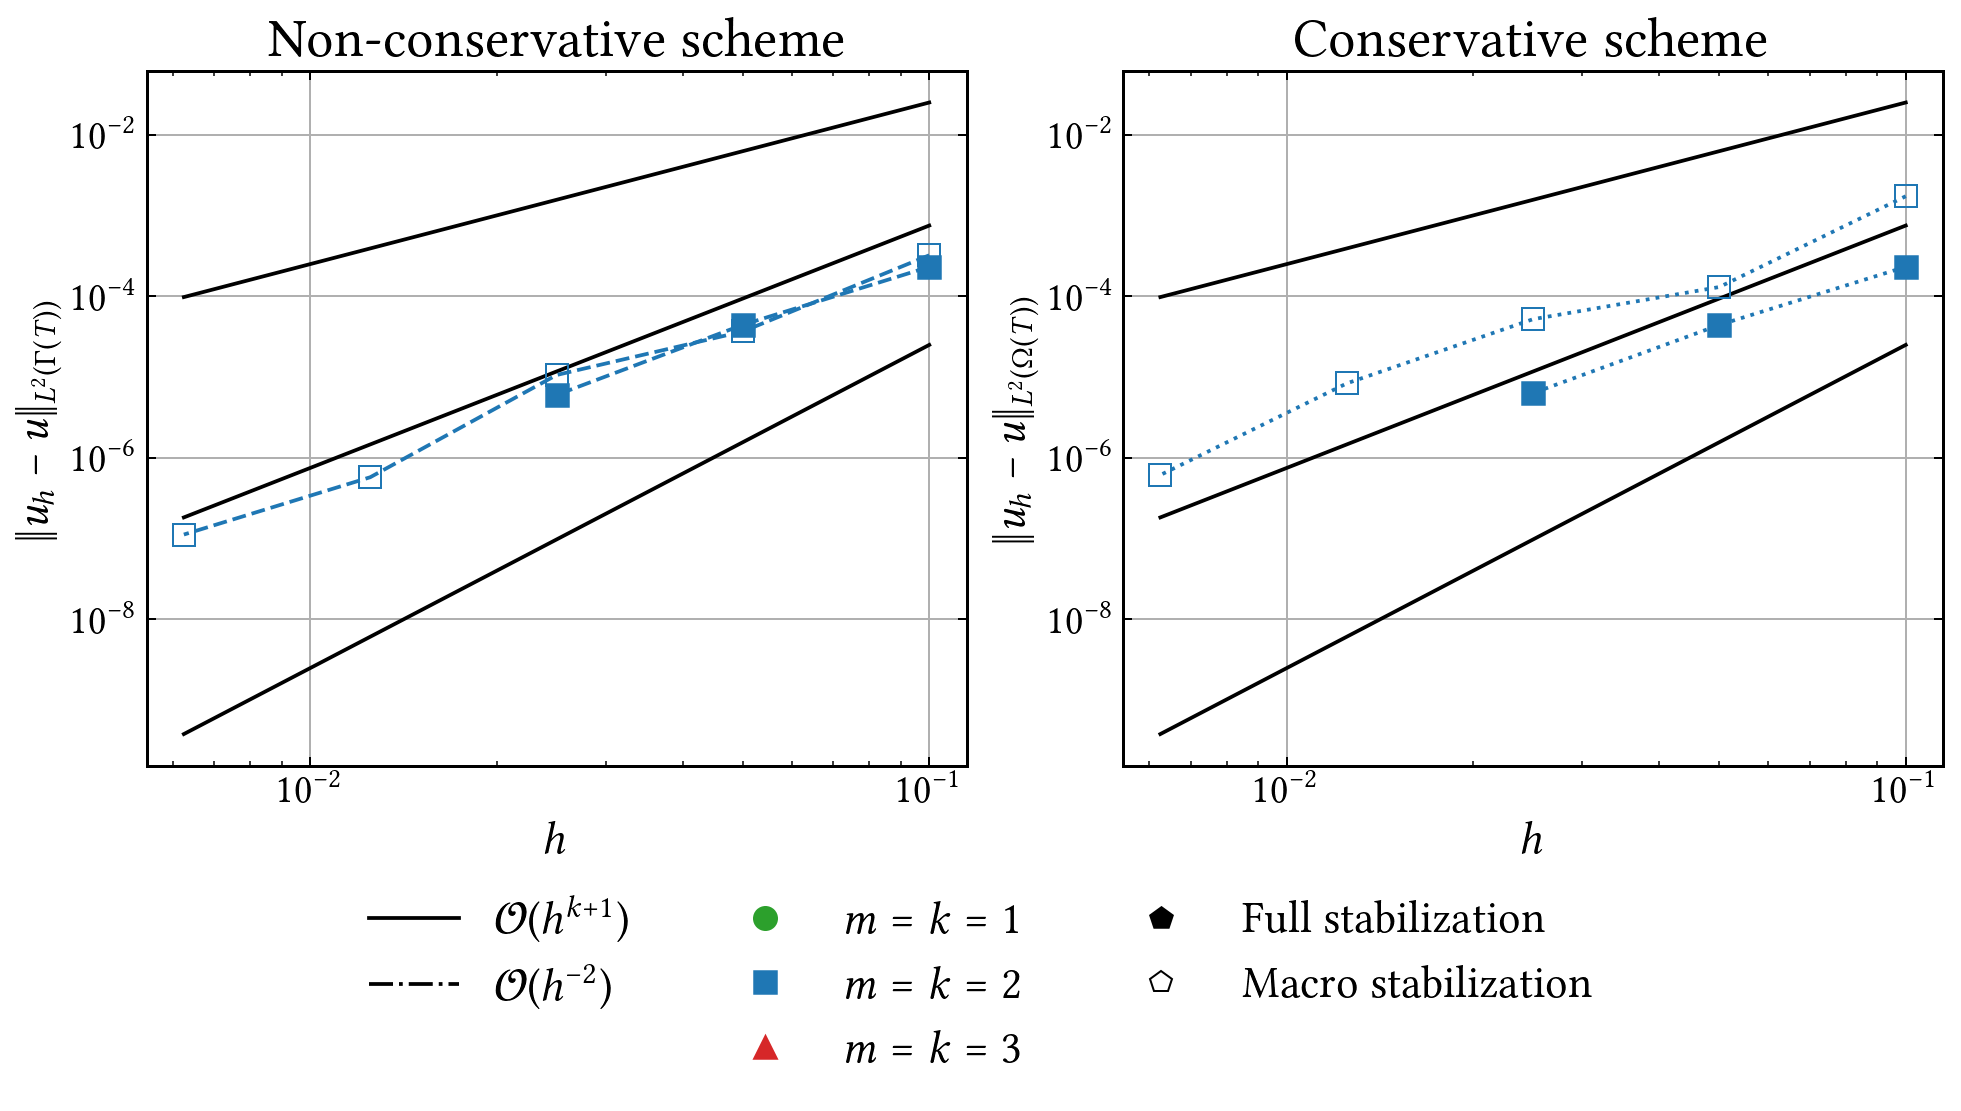

In [14]:
# T = 0.1, dT=h/3,

# tau = 0.1, N = 9 space and time, delta = 0.3
error_classical_P2P2_fullstab = [0.0002308907712078286, 4.432454661426852e-05, 6.0025284361083e-06]
error_classical_P2P2_macro = [0.0002793021099490077, 2.188442944783325e-05, 9.984065499925176e-07]

# tau = 0.1, N = 9 space and time
error_conservative_P2P2_fullstab = [0.0002288735865336615, 5.180745252014638e-05, 7.377190265863442e-06]
error_conservative_P2P2_macro = [0.0002791901226945423, 3.279926230293207e-05, 5.865810236387793e-06]

# tau = 0.1, N = 20 space and time
error_conservative_P2P2_fullstab = [0.0002314094638688852, 4.417107531808269e-05, 6.330301839612811e-06]
error_conservative_P2P2_macro = [0.0002793795247724209, 2.201006996331608e-05, 3.315692546966134e-06]

# tau1 = 50, tau2 = 0.1, N = 9, delta = 0.3
error_conservative_P2P2_macro = [0.0002793713536978101, 2.191184282539359e-05, 1.313803151506152e-06, 7.063019696654541e-07, 5.423128464939934e-07]

# tau = 0.1, N = 9 space and time
error_classical_P3P3_fullstab = [4.245823802962552e-05, 2.450753849981902e-06, 1.833733120652655e-07]

#error_conservative_P3P3_fullstab = 

#! redoing with same scaling on faces as on the interface stabilization

# tau1 = tau2 = 0.1, N = 9, delta = 0.3
error_classical_P2P2_macro = [0.000321537259124603, 3.666969195774377e-05, 1.059587925131085e-05, 5.753486890813752e-07, 1.123906583652098e-07]

# tau1 = tau2 = 0.1, N = 9, delta = 0.3
error_conservative_P2P2_macro = [0.0003227016502964278, 3.643082038528538e-05, 1.466528612729494e-05, 7.302384510071446e-07, 2.332675121055257e-06]

# tau1 = 50, tau2 = 0.1, N = 9, delta = 0.5
error_conservative_P2P2_macro = [0.001728781098015239, 0.000130129409111467, 5.202611590685709e-05, 8.340166433176429e-06, 6.132821183164051e-07]






h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dt = [0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

# Conservative scheme
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
#fig.suptitle("Conservative scheme", fontsize=26)
ax1.loglog(h, 2.5*np.power(h, 2), linestyle="-", color="black")   
ax1.loglog(h, 7.5e-1*np.power(h, 3), linestyle="-", color="black")   
ax1.loglog(h, 2.5e-1*np.power(h, 4), linestyle="-", color="black")   

nb_active_elements = [21, 76, 280, 1071, 4078]

ax1.loglog(h[:3], error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle="--", color="C0")
ax1.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0")
#ax1.loglog(h, error_classical_P3P3_fullstab, marker='^', markersize=9, linestyle="--", color="C3")

#ax1.set_ylim(1e-4, 2)
#ax1.set_xticks([0, 2, 4, 6])
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$h$")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u_h-u\|_{L^2(\Gamma(T))}$")
ax1.set_title(r"Non-conservative scheme")
#ax1.legend()
ax1.grid()



ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
#ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
#ax2.loglog([],[], linestyle="None", label=" ")
#ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
#ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 2.5*np.power(h, 2), linestyle="-", color="black")   
ax2.loglog(h, 7.5e-1*np.power(h, 3), linestyle="-", color="black")   
ax2.loglog(h, 2.5e-1*np.power(h, 4), linestyle="-", color="black")   

ax2.loglog(h[:3], error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
#ax2.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C3")


#ax2.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax2.set_xlabel(r"$h$")
# ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|u_h-u\|_{L^2(\Omega(T))}$")
ax2.set_title(r"Conservative scheme")
# #ax2.legend()
ax2.grid()

#handles, labels = [(a + b + c) for a, b, c in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

fig.tight_layout()
#fig.savefig("ex2_conservative.pdf")
plt.show()



### Deckelnick 2

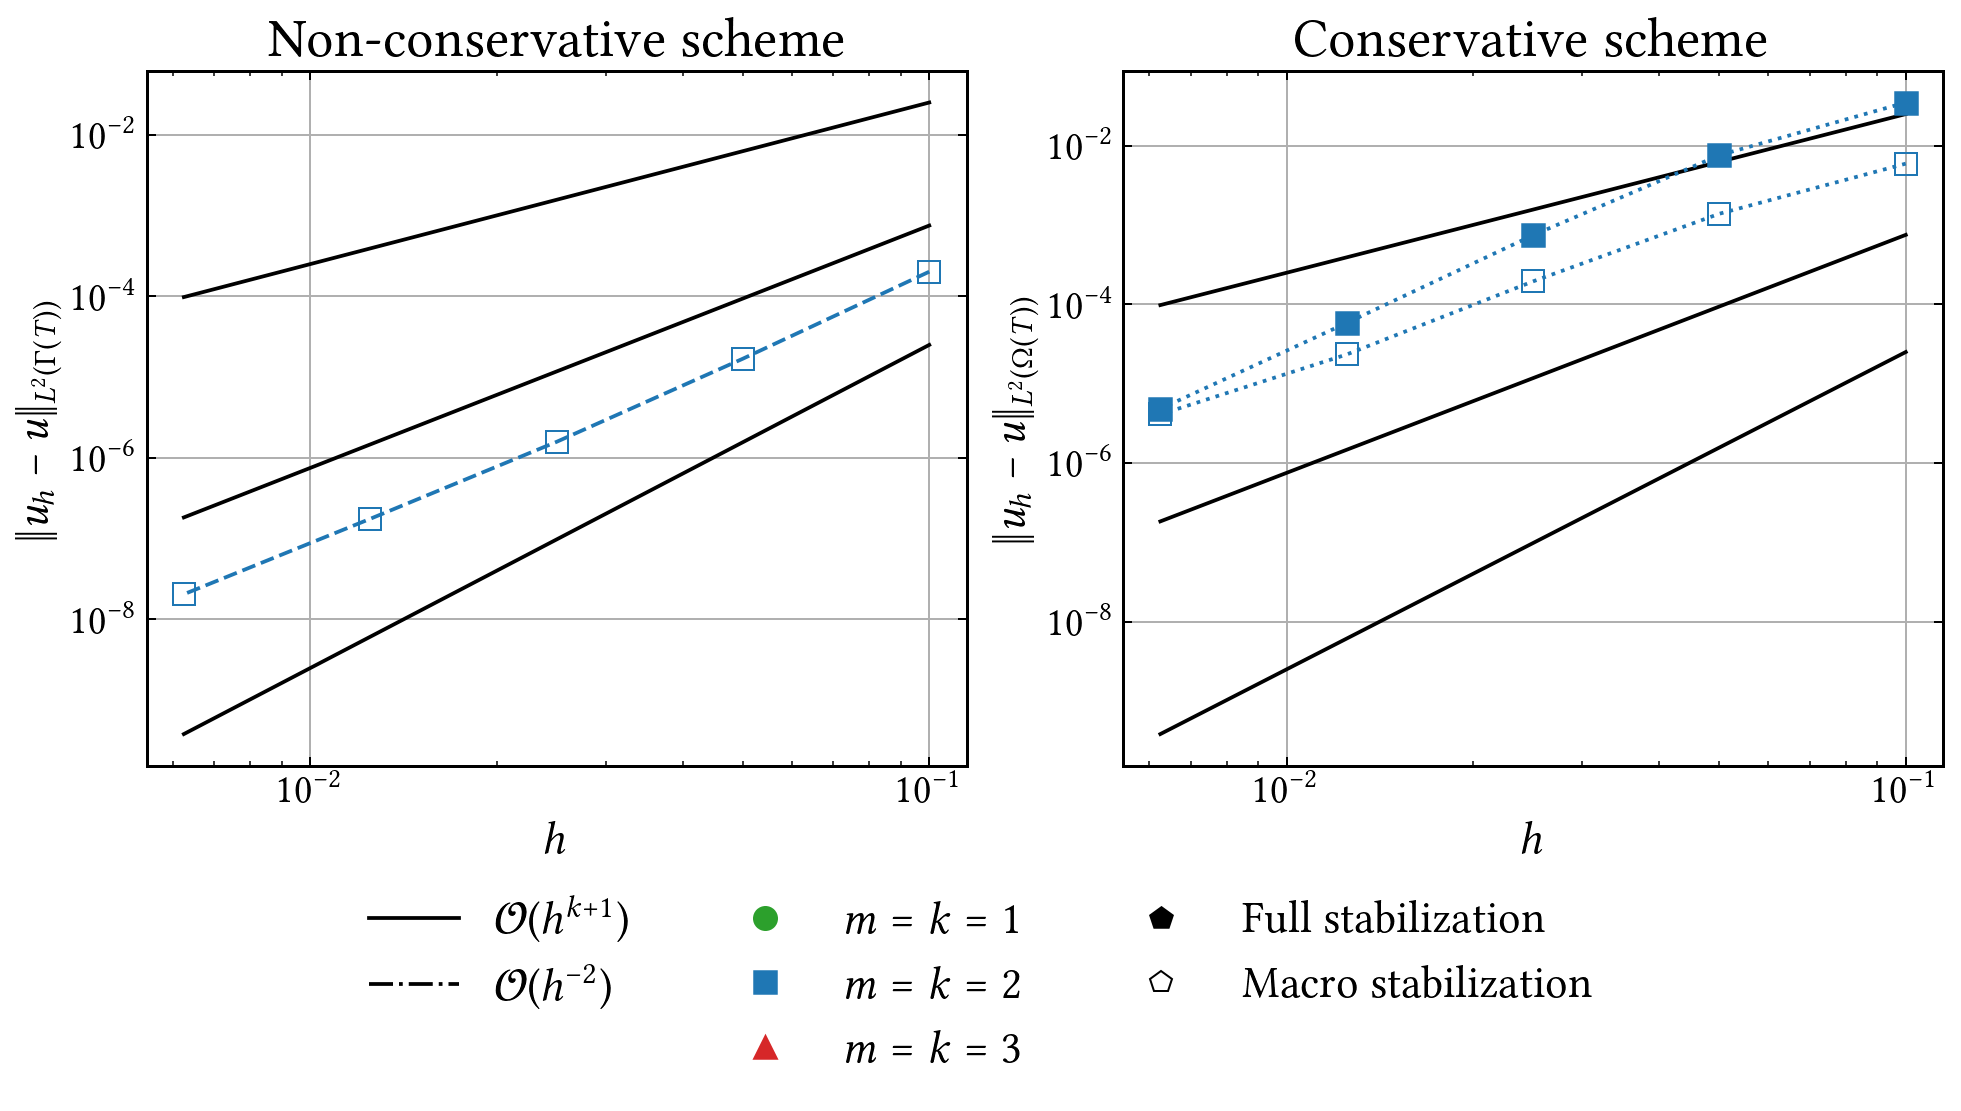

In [6]:
# T = 0.1, dT=h/3,

# tau1 = tau2 = 0.1, N = 9, delta = 0.5
error_classical_P2P2_macro = [0.0002013642024645432, 1.687578607079236e-05, 1.577554568781206e-06, 1.758723348644797e-07, 2.050994653344463e-08]


# tau1 = tau2 = 0.1, N = 9, delta = 0.3
#error_conservative_P2P2_macro = 

# tau1 = 100, tau2 = 0.1, N = 9, delta = 0.5
error_conservative_P2P2_macro = [0.002050581056093068, 0.0003635480009018896, 6.09070622302325e-05, 2.180365804905244e-05, 1.126051341501097e-05]

# tau1 = tau2 = 100, N = 9, delta = 0.5
error_conservative_P2P2_macro = [0.005930103666288682, 0.001385348975484011, 0.0001943604732648302, 2.328863609209911e-05, 4.089303306803299e-06]

# old scaling h^2 and h^4 for Gamma scaling
# tau1 = tau2 = 100, N = 9, delta = 0.5
# -> worse than above
#error_conservative_P2P2_macro = [0.00315705000099392, 0.0004273817525208244, 5.270428917605612e-05, 2.467014433783213e-05, 2.081522802370553e-05]

# tau1 = 0.1, tau2 = 100, N = 9, delta = 0.5
#error_conservative_P2P2_macro = [0.0004501661119263044, 0.0002008020671494043, 0.0001090190512734574, 4.956380808809345e-05, 2.107026794123589e-05]

# tau1 = tau2 = 100, N = 9
error_conservative_P2P2_fullstab = [0.03498327018362724, 0.00757136241875422, 0.0007422511651590412, 5.8133215886631e-05, 4.807611167620423e-06]

# tau1 = 1, tau2 = 1, N = 14
#error_conservative_P2P2_fullstab = didnt converge well

# tau1 = 1, tau2 = 1, N = 20
#! linux vscode
#error_conservative_P2P2_fullstab =


# tau1 = 1, tau2 = 1, N = 9
#error_classical_P2P2_fullstab = 

h = [0.1, 0.05, 0.025, 0.0125, 0.00625]
dt = [0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]

# Conservative scheme
#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))
#fig.suptitle("Conservative scheme", fontsize=26)
ax1.loglog(h, 2.5*np.power(h, 2), linestyle="-", color="black")   
ax1.loglog(h, 7.5e-1*np.power(h, 3), linestyle="-", color="black")   
ax1.loglog(h, 2.5e-1*np.power(h, 4), linestyle="-", color="black")   

nb_active_elements = [21, 76, 280, 1071, 4078]

#ax1.loglog(h[:3], error_classical_P2P2_fullstab, marker='s', markersize=9, linestyle="--", color="C0")
ax1.loglog(h, error_classical_P2P2_macro, marker='s', markersize=9, linestyle="--", markeredgewidth=0.8, markerfacecolor="None", color="C0")
#ax1.loglog(h, error_classical_P3P3_fullstab, marker='^', markersize=9, linestyle="--", color="C3")

#ax1.set_ylim(1e-4, 2)
#ax1.set_xticks([0, 2, 4, 6])
#ax1.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel(r"$h$")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|u_h-u\|_{L^2(\Gamma(T))}$")
ax1.set_title(r"Non-conservative scheme")
#ax1.legend()
ax1.grid()



ax2.loglog([],[], label=r"$\mathcal{O}(h^{k+1})$", linestyle="-", color="black")
ax2.loglog([],[], label=r"$\mathcal{O}(h^{-2})$", linestyle="-.", color="black")
ax2.loglog([],[], linestyle="None", label=" ")
#ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"$m=1, k=0$")
ax2.loglog([],[], linestyle="None",  marker='o', markersize=9, color="C2", label=r"$m = k = 1$")
ax2.loglog([],[], linestyle="None",  marker='s', markersize=9, color="C0", label=r"$m = k = 2$")
ax2.loglog([],[], linestyle="None",  marker='^', markersize=9, color="C3", label=r"$m = k = 3$")
#ax2.loglog([],[], linestyle="None", label=" ")
#ax2.loglog([],[], linestyle=(0, (5,7)), color="black",label=r"Non-conservative Scheme")
#ax2.loglog([],[], linestyle=":", color="black", label=r"Conservative Scheme")
#ax2.loglog([],[], linestyle="None", label=" ")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, color="black", label=r"Full stabilization")
ax2.loglog([],[], linestyle="None",  marker='p', markersize=9, markeredgewidth=0.8, markerfacecolor="None", color="black", label=r"Macro stabilization")

ax2.loglog(h, 2.5*np.power(h, 2), linestyle="-", color="black")   
ax2.loglog(h, 7.5e-1*np.power(h, 3), linestyle="-", color="black")   
ax2.loglog(h, 2.5e-1*np.power(h, 4), linestyle="-", color="black")   

ax2.loglog(h, error_conservative_P2P2_fullstab, marker='s', markersize=9, linestyle=":", color="C0")
ax2.loglog(h, error_conservative_P2P2_macro, marker='s', markersize=9, linestyle=":", markeredgewidth=0.8, markerfacecolor="None", color="C0")
#ax2.loglog(h, error_conservative_P3P3_fullstab, marker='^', markersize=9, linestyle=":", color="C3")


#ax2.set_yticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax2.set_xlabel(r"$h$")
# ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|u_h-u\|_{L^2(\Omega(T))}$")
ax2.set_title(r"Conservative scheme")
# #ax2.legend()
ax2.grid()

#handles, labels = [(a + b + c) for a, b, c in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels())]
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=3, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

fig.tight_layout()
#fig.savefig("ex2_conservative.pdf")
plt.show()

